In [1]:
from IPython.display import display # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import plotly.express as px
import pandas as pd


In [2]:
print("2019")
dd19 = pd.read_csv("..\delitos denunciados 2019.csv")
print(dd19.shape)
display(dd19.head(1))

print("2020")
dd20 = pd.read_csv("..\delitos denunciados 2020.csv")
print(dd20.shape)
# Son todos los "dist_pjfs" diferentes?
display(dd20.head(1))

print("2021")
dd21 = pd.read_csv("..\delitos denunciados 2021.csv")
print(dd21.shape)
display(dd21.head(1))

print("2022")
dd22 = pd.read_csv("..\delitos denunciados 2022.csv")
print(dd22.shape)
display(dd22.head(1))

print("2023")
dd23 = pd.read_csv("..\delitos denunciados 2023.csv")
print(dd23.shape)
display(dd23.head(1))

2019
(9363, 16)


,periodo_denuncia,anio_denuncia,Fecha_descarga,distrito_fiscal,especialidad,tipo_caso,generico,subgenerico,articulo,des_articulo,cantidad,ubigeo_pjfs,dpto_pjfs,prov_pjfs,dist_pjfs,fecha_corte
0,ENERO - DICIEMBRE,2019,13/01/2020,AMAZONAS,PENAL,DENUNCIA,CONTRA EL HONOR,CONTRA EL HONOR (Sin especificar delito subgen...,S/Art,CONTRA EL HONOR,4,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,14/06/2023


2020
(8583, 16)


,periodo_denuncia,anio_denuncia,Fecha_descarga,distrito_fiscal,especialidad,tipo_caso,generico,subgenerico,articulo,des_articulo,cantidad,ubigeo_pjfs,dpto_pjfs,prov_pjfs,dist_pjfs,fecha_corte
0,ENERO - DICIEMBRE,2020,08/01/2021,AMAZONAS,PENAL,DENUNCIA,CONTRA EL ESTADO Y LA DEFENSA NACIONAL,ATENTADOS CONTRA SEGURIDAD NACIONAL Y TRAICIÓN...,326,Participación en grupo armado dirigido por ext...,1,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,15/06/2023


2021
(12314, 16)


,periodo_denuncia,anio_denuncia,Fecha_descarga,distrito_fiscal,especialidad,tipo_caso,generico,subgenerico,articulo,des_articulo,cantidad,ubigeo_pjfs,dpto_pjfs,prov_pjfs,dist_pjfs,fecha_corte
0,ENERO - DICIEMBRE,2021,10/01/2022,AMAZONAS,PENAL,DENUNCIA,CONTRA EL ESTADO Y LA DEFENSA NACIONAL,ATENTADOS CONTRA SEGURIDAD NACIONAL Y TRAICIÓN...,326,Participación en grupo armado dirigido por ext...,1,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,15/06/2023


2022
(9152, 16)


,periodo_denuncia,anio_denuncia,Fecha_descarga,distrito_fiscal,especialidad,tipo_caso,generico,subgenerico,articulo,des_articulo,cantidad,ubigeo_pjfs,dpto_pjfs,prov_pjfs,dist_pjfs,fecha_corte
0,ENERO - DICIEMBRE,2022,06/01/2023,AMAZONAS,PENAL,DENUNCIA,CONTRA EL HONOR,CONTRA EL HONOR (Sin especificar delito subgen...,S/Art,CONTRA EL HONOR,4,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,15/06/2023


2023
(9032, 16)


,periodo_denuncia,anio_denuncia,fecha_descarga,distrito_fiscal,especialidad,tipo_caso,generico,subgenerico,articulo,des_articulo,cantidad,ubigeo_pjfs,dpto_pjfs,prov_pjfs,dist_pjfs,fecha_corte
0,ENERO - DICIEMBRE,2023,1/8/2024,AMAZONAS,PENAL,DENUNCIA,CONTRA EL HONOR,"INJURIA,CALUMNIA Y DIFAMACION",130,Injuria,2,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,1/24/2024


In [3]:
columns = [col.lower() for col in dd19.columns.to_list()]

dd19.columns = columns
dd20.columns = columns
dd21.columns = columns
dd22.columns = columns
dd23.columns = columns


In [4]:
# Apilar los dataframes
dd = pd.concat([dd19, dd20, dd21, dd22, dd23])

# ESPECIALIDAD: PENAL (TODOS)
# TIPO CASO: DENUNCIA (TODOS)
dd.drop(columns=["periodo_denuncia", "fecha_descarga", "especialidad", "tipo_caso", "fecha_corte"], inplace=True)
display(dd.head())


,anio_denuncia,distrito_fiscal,generico,subgenerico,articulo,des_articulo,cantidad,ubigeo_pjfs,dpto_pjfs,prov_pjfs,dist_pjfs
0,2019,AMAZONAS,CONTRA EL HONOR,CONTRA EL HONOR (Sin especificar delito subgen...,S/Art,CONTRA EL HONOR,4,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS
1,2019,AMAZONAS,CONTRA EL HONOR,"INJURIA,CALUMNIA Y DIFAMACION",130,Injuria,1,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS
2,2019,AMAZONAS,CONTRA EL HONOR,"INJURIA,CALUMNIA Y DIFAMACION",131,Calumnia,2,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS
3,2019,AMAZONAS,CONTRA EL HONOR,"INJURIA,CALUMNIA Y DIFAMACION",132,Difamación,14,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS
4,2019,AMAZONAS,CONTRA EL HONOR,"INJURIA,CALUMNIA Y DIFAMACION",S/Art,"INJURIA, CALUMNIA Y DIFAMACIÓN",1,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS


In [5]:
# Generico y subgenerico
# gsg = dd[['generico', 'subgenerico']].drop_duplicates()
# Agregar columna de suma de la columna "cantidad"
gsg = dd.groupby(['generico', 'subgenerico']).agg({'cantidad': 'sum'}).reset_index()
gsg = gsg.sort_values(by='cantidad', ascending=False)
display(gsg)

,generico,subgenerico,cantidad
78,CONTRA LA VIDA/EL CUERPO Y LA SALUD,LESIONES,1737968
23,CONTRA EL PATRIMONIO,HURTO,610396
70,CONTRA LA SEGURIDAD PUBLICA,DELITO DE PELIGRO COMUN,323848
25,CONTRA EL PATRIMONIO,ROBO,308483
43,CONTRA LA FAMILIA,OMISION DE ASISTENCIA FAMILIAR,296124
...,...,...,...
105,DELITOS TRIBUTARIOS,DELITOS TRIBUTARIOS (Sin especificar delito su...,5
95,DELITOS ADUANEROS (LEY 28008),FINANCIAMIENTO,4
85,CONTRA LOS PODERES DEL ESTADO Y ORDEN CONSTITU...,DELITOS CONTRA LOS PODERES DEL ESTADO Y ORDEN ...,4
86,CONTRA LOS PODERES DEL ESTADO Y ORDEN CONSTITU...,DISPOSICIONES COMUNES,2


In [7]:
fig = px.sunburst(
    gsg,
    path=['generico', 'subgenerico'],
    width=800,  # Ajusta el ancho de la figura
    height=800  # Ajusta la altura de la figura
)
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))  # Ajusta los márgenes
fig.show()

In [8]:
gsgwa = dd.groupby(['generico', 'subgenerico', 'des_articulo']).agg({'cantidad': 'sum'}).reset_index()
gsgwa = gsgwa.sort_values(by='cantidad', ascending=False)

fig = px.sunburst(
    gsgwa,
    path=['generico', 'subgenerico'],
    values='cantidad',
    width=800,  # Ajusta el ancho de la figura
    height=800  # Ajusta la altura de la figura
)
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))  # Ajusta los márgenes
fig.show()

In [9]:
fig = px.sunburst(
    gsgwa,
    path=['generico', 'subgenerico', 'des_articulo'],
    values='cantidad',
    width=800,  # Ajusta el ancho de la figura
    height=800  # Ajusta la altura de la figura
)
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))  # Ajusta los márgenes
fig.show()

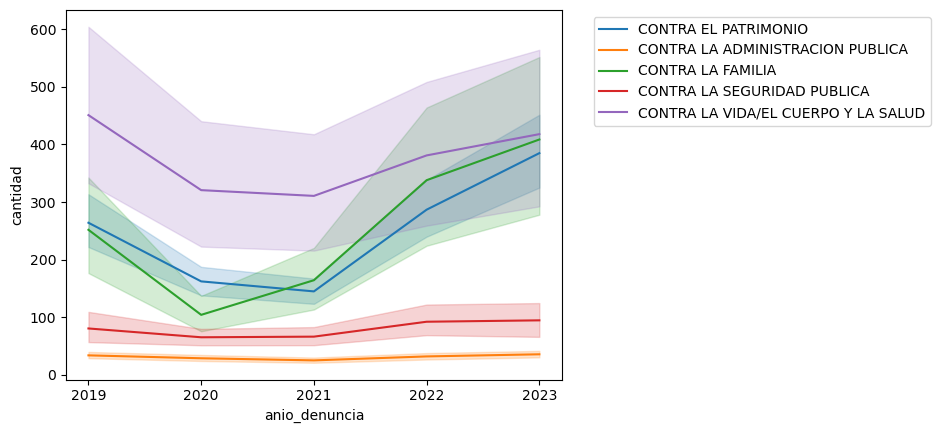

In [10]:
# LINE CHART
top_5_genericos = dd.groupby('generico').agg({'cantidad': 'sum'}).nlargest(5, 'cantidad').reset_index()
sns.lineplot(data=dd[dd['generico'].isin(top_5_genericos['generico'])], x='anio_denuncia', y='cantidad', hue='generico')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.xticks(ticks=[2019, 2020, 2021, 2022, 2023], labels=[2019, 2020, 2021, 2022, 2023])
plt.show()

In [6]:
import geopandas as gpd
import fiona
import os
import fiona
print(fiona.__version__)
print(dir(fiona))  # Muestra los atributos del módulo


c:\Users\dial_\anaconda3\envs\endes_env\Lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


1.9.5
['BytesCollection', 'Collection', 'Env', 'FIELD_TYPES_MAP', 'Feature', 'FionaDeprecationWarning', 'Geometry', 'MemoryFile', 'ParsedPath', 'Path', 'Properties', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__gdal_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_bounds', '_env', '_err', '_geometry', '_listdir', '_listlayers', '_remove', '_remove_layer', '_show_versions', '_whl_dir', 'bounds', 'calc_gdal_version_num', 'collection', 'compat', 'crs', 'driver_count', 'drivers', 'drvsupport', 'ensure_env_with_credentials', 'enums', 'env', 'errors', 'gdal_version', 'get_gdal_release_name', 'get_gdal_version_num', 'get_gdal_version_tuple', 'glob', 'io', 'listdir', 'listlayers', 'log', 'logging', 'logutils', 'meta', 'model', 'ogrext', 'open', 'os', 'p', 'parse_path', 'path', 'platform', 'prop_type', 'prop_width', 'remove', 'rfc3339', 'schema', 'session', 'show_versions', 'supported_drivers', 'uuid', 'vfs', 'vfs_parse_paths', 

In [7]:
shapefile_path = r"..\Departamental INEI 2023 geogpsperu SuyoPomalia\Departamental INEI 2023 geogpsperu SuyoPomalia.shp"
departamentos = gpd.read_file(shapefile_path)

departamentos_plus = pd.read_csv(r"..\regional_df.csv")

# Quitar tildes de region_provincia_distrito
departamentos_plus["region_provincia_distrito"] = departamentos_plus["region_provincia_distrito"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

print(departamentos.head(1))
display(departamentos_plus.head())

departamentos = departamentos.merge(departamentos_plus, how="left", left_on="DEPARTAMEN", right_on="region_provincia_distrito")
print(departamentos.head(1))

c:\Users\dial_\anaconda3\envs\endes_env\Lib\site-packages\pyogrio\core.py:36: RuntimeWarning: Could not detect PROJ data files.  Set PROJ_LIB environment variable to the correct path.
  _init_proj_data()


  CCDD DEPARTAMEN  OBJECTID  ESRI_OID  \
0   01   AMAZONAS       1.0       1.0   

                                            geometry  
0  POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...  


,ubigeo,region_provincia_distrito,poblacion_total_2007,poblacion_total_2017,poblacion_total_2020,poblacion_menores_uno_2017,poblacion_mayores_80_2020,poblacion_discapacidad_2020,superficie_km2,densidad_2020,...,indice_desarrollo_humano_2019,porcentaje_poblacion_pobreza_total,numero_habitantes_pobreza_total,porcentaje_poblacion_pobreza_extrema,numero_habitantes_pobreza_extrema,poblacion_ocupada_2007,poblacion_ocupada_2017,devengado_per_capita_actividad_2020,devengado_per_capita_inversion_2020,devengado_per_capita_total_2020
0,150000,LIMA,8730820,10135009,11261067,137218,217672,88625,34823.52,323.375322,...,0.707336,26.25,2.956030e+06,3.05,343462.5435,3625326,4.873073e+06,6923.735936,488.735054,7412.470989
1,10000,AMAZONAS,406087,417365,472993,8043,7743,7826,39249.13,12.051044,...,0.417736,32.95,1.558512e+05,7.30,34528.4890,124320,1.427014e+05,3919.830013,1561.378837,5481.208850
2,60000,CAJAMARCA,1476708,1427527,1603521,24296,34202,14891,33304.32,48.147538,...,0.425118,43.65,6.999369e+05,12.95,207655.9695,439480,4.943605e+05,3413.331404,774.510604,4187.842009
3,130000,LA LIBERTAD,1682213,1888972,2054619,32610,38674,12707,25495.42,80.587768,...,0.548224,32.95,6.769970e+05,7.30,149987.1870,567300,7.372602e+05,2516.544411,655.059079,3171.603489
4,140000,LAMBAYEQUE,1174519,1244821,1393148,20923,26935,8254,14461.52,96.334825,...,0.534252,17.30,2.410146e+05,0.55,7662.3140,377864,4.792206e+05,2541.591065,443.446746,2985.037811


  CCDD DEPARTAMEN  OBJECTID  ESRI_OID  \
0   01   AMAZONAS       1.0       1.0   

                                            geometry  ubigeo  \
0  POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...   10000   

  region_provincia_distrito  poblacion_total_2007  poblacion_total_2017  \
0                  AMAZONAS                406087                417365   

   poblacion_total_2020  ...  indice_desarrollo_humano_2019  \
0                472993  ...                       0.417736   

   porcentaje_poblacion_pobreza_total  numero_habitantes_pobreza_total  \
0                               32.95                      155851.1935   

   porcentaje_poblacion_pobreza_extrema  numero_habitantes_pobreza_extrema  \
0                                   7.3                          34528.489   

  poblacion_ocupada_2007  poblacion_ocupada_2017  \
0                 124320           142701.360234   

   devengado_per_capita_actividad_2020  devengado_per_capita_inversion_2020  \
0                   

In [8]:
# Agrupar por año y departamento
dd_departamentos = dd.groupby(['anio_denuncia', 'dpto_pjfs']).agg({'cantidad': 'sum'}).reset_index()
dd_departamentos

,anio_denuncia,dpto_pjfs,cantidad
0,2019,AMAZONAS,10822
1,2019,ANCASH,45673
2,2019,APURIMAC,16946
3,2019,AREQUIPA,69065
4,2019,AYACUCHO,24784
...,...,...,...
120,2023,PUNO,23957
121,2023,SAN MARTIN,29232
122,2023,TACNA,16934
123,2023,TUMBES,10550


In [9]:
departamentos = departamentos.merge(dd_departamentos, left_on='DEPARTAMEN', right_on='dpto_pjfs')
departamentos.drop(columns=['dpto_pjfs'], inplace=True)

# Denuncias por cada 100000 habitantes
departamentos['denuncias_por_100k'] = departamentos['cantidad'] / departamentos['poblacion_total_2020'] * 100000


In [10]:
display(departamentos)

,CCDD,DEPARTAMEN,OBJECTID,ESRI_OID,geometry,ubigeo,region_provincia_distrito,poblacion_total_2007,poblacion_total_2017,poblacion_total_2020,...,porcentaje_poblacion_pobreza_extrema,numero_habitantes_pobreza_extrema,poblacion_ocupada_2007,poblacion_ocupada_2017,devengado_per_capita_actividad_2020,devengado_per_capita_inversion_2020,devengado_per_capita_total_2020,anio_denuncia,cantidad,denuncias_por_100k
0,01,AMAZONAS,1.0,1.0,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",10000,AMAZONAS,406087,417365,472993,...,7.30,34528.4890,124320,142701.360234,3919.830013,1561.378837,5481.208850,2019,10822,2287.983120
1,01,AMAZONAS,1.0,1.0,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",10000,AMAZONAS,406087,417365,472993,...,7.30,34528.4890,124320,142701.360234,3919.830013,1561.378837,5481.208850,2020,8572,1812.288977
2,01,AMAZONAS,1.0,1.0,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",10000,AMAZONAS,406087,417365,472993,...,7.30,34528.4890,124320,142701.360234,3919.830013,1561.378837,5481.208850,2021,14035,2967.274357
3,01,AMAZONAS,1.0,1.0,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",10000,AMAZONAS,406087,417365,472993,...,7.30,34528.4890,124320,142701.360234,3919.830013,1561.378837,5481.208850,2022,13787,2914.842292
4,01,AMAZONAS,1.0,1.0,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",10000,AMAZONAS,406087,417365,472993,...,7.30,34528.4890,124320,142701.360234,3919.830013,1561.378837,5481.208850,2023,14956,3161.991827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,25,UCAYALI,25.0,25.0,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...",250000,UCAYALI,444209,548998,632861,...,3.05,19302.2605,155213,211396.712159,2900.692046,811.991675,3712.683721,2019,24802,3919.028033
121,25,UCAYALI,25.0,25.0,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...",250000,UCAYALI,444209,548998,632861,...,3.05,19302.2605,155213,211396.712159,2900.692046,811.991675,3712.683721,2020,12890,2036.782169
122,25,UCAYALI,25.0,25.0,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...",250000,UCAYALI,444209,548998,632861,...,3.05,19302.2605,155213,211396.712159,2900.692046,811.991675,3712.683721,2021,12772,2018.136684
123,25,UCAYALI,25.0,25.0,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...",250000,UCAYALI,444209,548998,632861,...,3.05,19302.2605,155213,211396.712159,2900.692046,811.991675,3712.683721,2022,16400,2591.406328


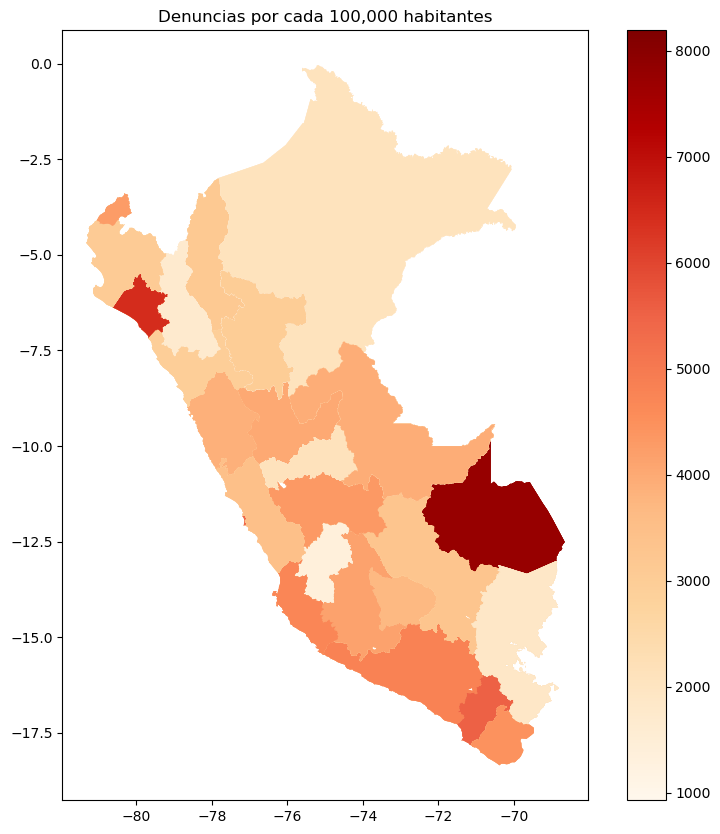

In [16]:
departamentos.plot(column='denuncias_por_100k', legend=True, figsize=(10, 10), cmap='OrRd')
plt.title("Denuncias por cada 100,000 habitantes")
plt.show()

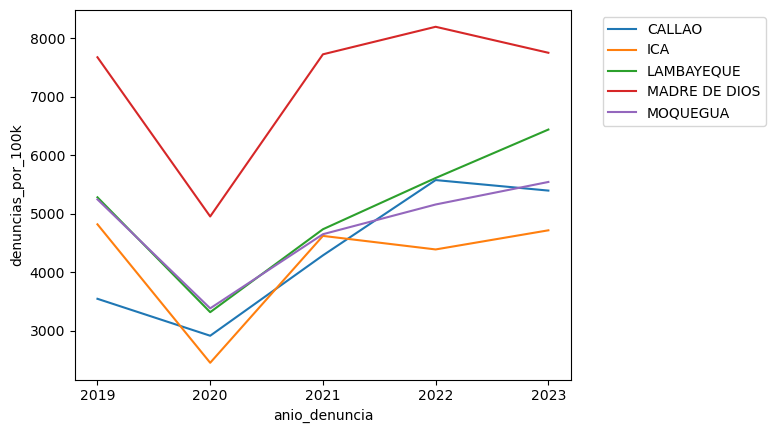

In [17]:
departamentos_grouped = departamentos.groupby(['DEPARTAMEN']).agg({'denuncias_por_100k': 'mean'}).reset_index()
top_5_departamentos = departamentos_grouped.nlargest(5, 'denuncias_por_100k')
lista = top_5_departamentos.DEPARTAMEN.unique().tolist()

sns.lineplot(data=departamentos[departamentos['DEPARTAMEN'].isin(lista)], x='anio_denuncia', y='denuncias_por_100k', hue='DEPARTAMEN')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Mueve la leyenda fuera del gráfico
plt.xticks(ticks=[2019, 2020, 2021, 2022, 2023], labels=[2019, 2020, 2021, 2022, 2023])
plt.show()

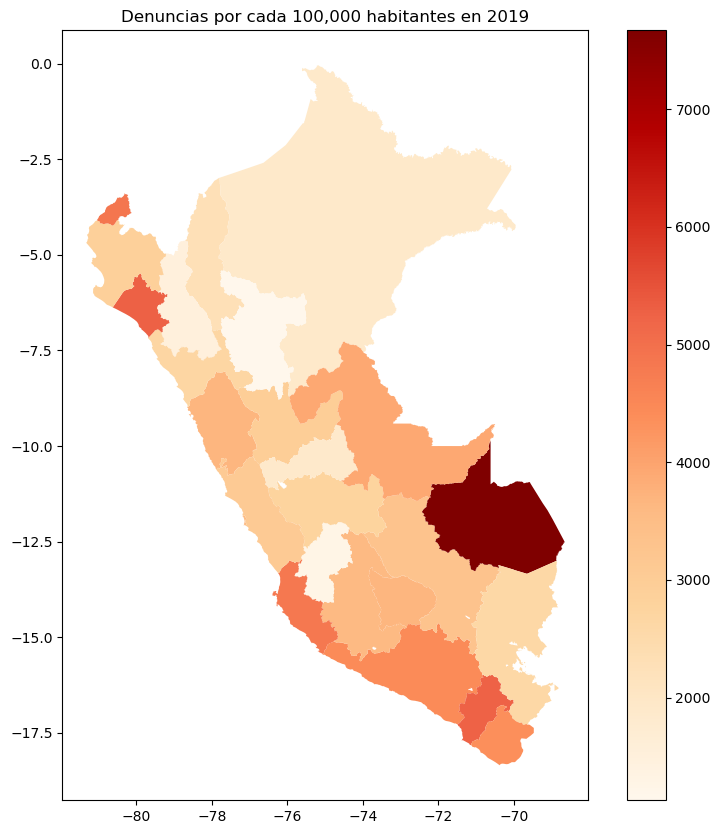

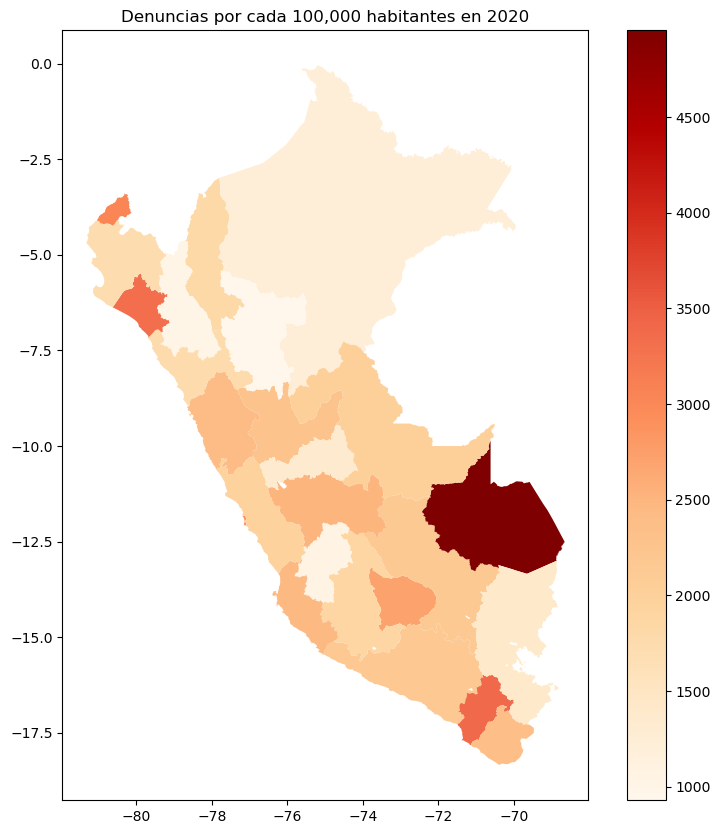

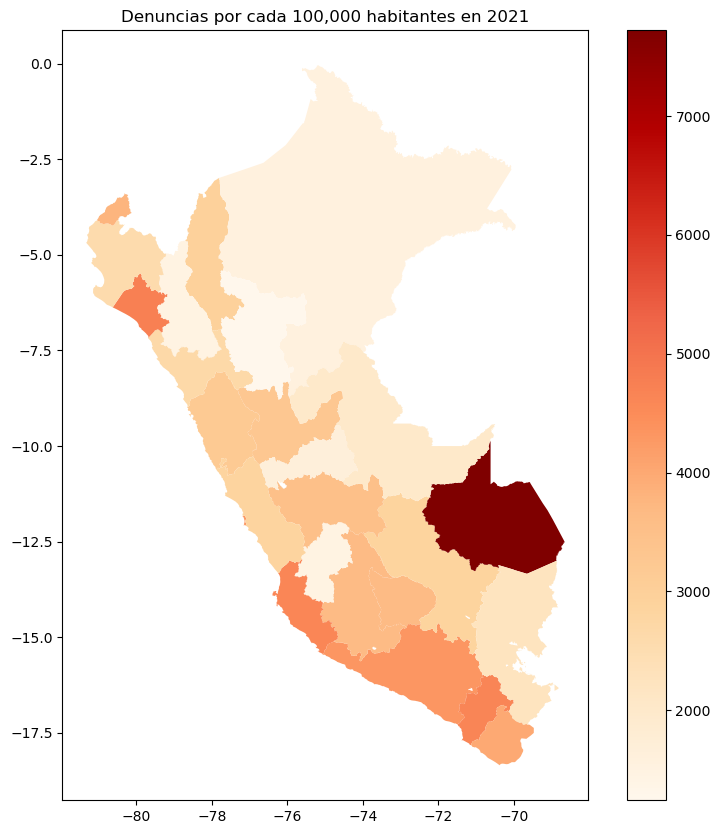

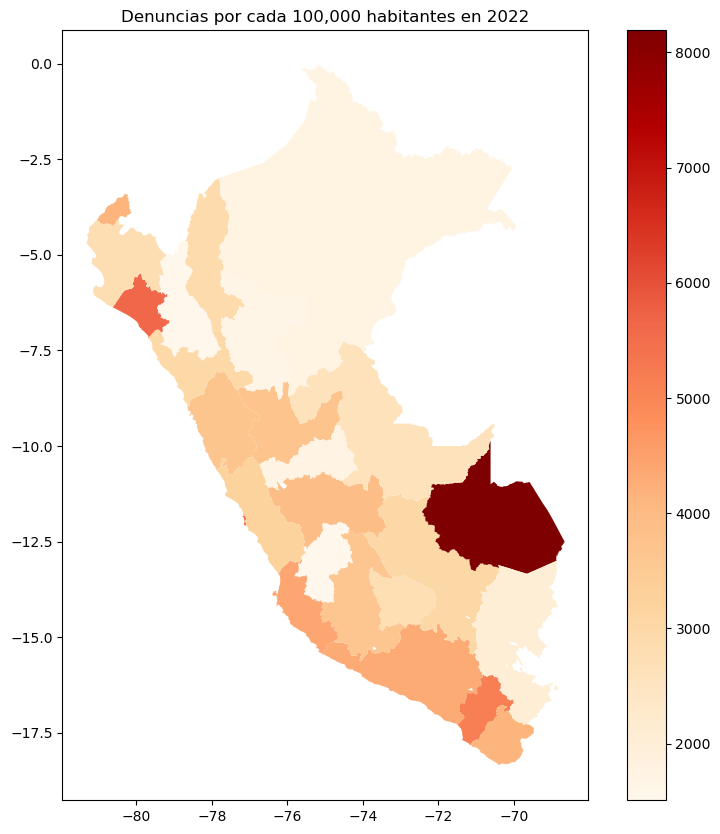

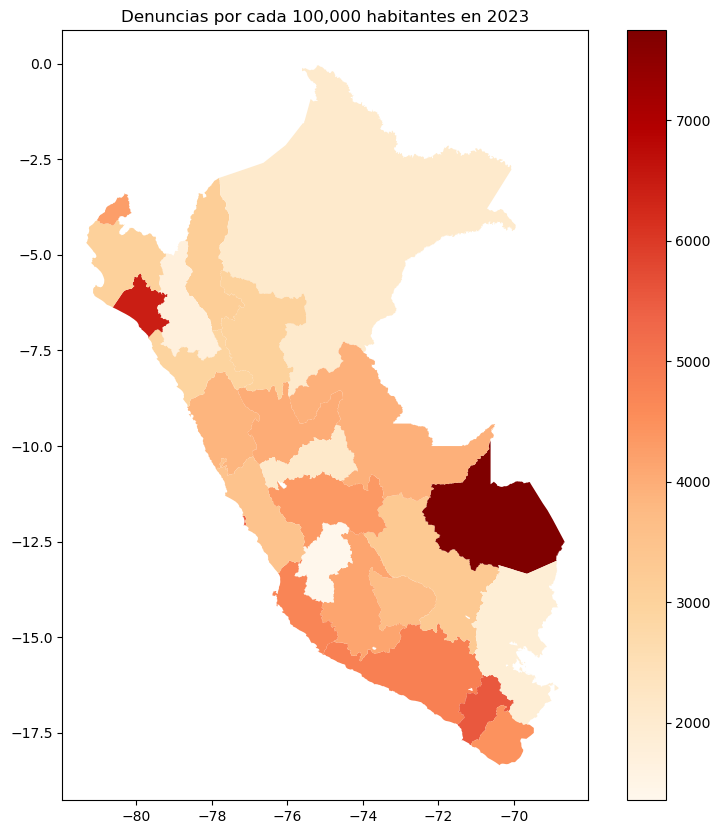

In [18]:
for anio in departamentos.anio_denuncia.unique():
    departamentos[departamentos['anio_denuncia'] == anio].plot(column='denuncias_por_100k', legend=True, figsize=(10, 10), cmap='OrRd')
    plt.title(f"Denuncias por cada 100,000 habitantes en {anio}")
    plt.show()

In [19]:
# Time-lapse map plotly

# fig = px.choropleth(
#     departamentos,
#     geojson=departamentos.geometry,
#     locations=departamentos.index,
#     color='denuncias_por_100k',
#     hover_name='DEPARTAMEN',
#     animation_frame='anio_denuncia',
#     projection='mercator',
#     color_continuous_scale="OrRd"  # Aplicar el colormap OrRd
# )

# # Ajustar el tamaño del mapa
# fig.update_layout(
#     height=800,  # Aumenta la altura para hacerlo más vertical
#     width=600,   # Mantiene un buen aspecto sin ser muy cuadrado
#     margin={"r":0,"t":0,"l":0,"b":0}  # Elimina márgenes innecesarios
# )

# fig.update_geos(fitbounds="locations", visible=False)
# fig.show()

- **anio_denuncia**: Año de la denuncia en el Ministerio Público
- **distrito_fiscal**: Nombre del distrito fiscal
- **generico**: Título del delito en el código penal (general)
- **subgenerico**: Capítulo del título del delito en el código penal (específico)
- **articulo**: Artículo del delito según el código penal
- **des_articulo**: Nombre del artículo según el código penal
- **cantidad**: Número de delitos denunciados
- **ubigeo_pjfs**: Ubigeo de la Presidencia de Junta de Fiscales Superiores del Distrito Fiscal(PJFS)
- **dpto_pjfs**: Departamento donde se encuentra ubicado la PJFS
- **prov_pjfs**: Provincia donde se encuentra ubicado la PJFS
- **dist_pjfs**: Distrito donde se encuentra ubicado la PJFS

### Clasificación de Delitos según el Código Penal

1. Delitos contra la vida, el cuerpo y la salud  
2. Delitos contra la dignidad humana  
3. Delitos contra el honor  
4. Delitos contra la familia  
5. Delitos contra la libertad  
6. Delitos contra el patrimonio  
7. Delitos contra la confianza y la buena fe en los negocios  
8. Delitos contra los derechos intelectuales  
9. Delitos contra el patrimonio cultural  
10. Delitos contra el orden económico  
11. Delitos contra el orden financiero y monetario  
12. Delitos tributarios  
13. Delitos contra la seguridad pública  
14. Delitos ambientales  
15. Delitos contra la tranquilidad pública  
16. Delitos contra la humanidad  
17. Delitos contra el Estado y la defensa nacional  
18. Delitos contra los poderes del Estado y el orden constitucional  
19. Delitos contra la voluntad popular  
20. Delitos contra la administración pública  
21. Delitos contra la fe pública  


In [11]:
#elimninar las filas que tienen en la columna generico la palabra "NO TIPIFICADOS" y "TENTATIVA"
dd = dd[~dd['generico'].str.contains("NO TIPIFICADOS")]
dd = dd[~dd['generico'].str.contains("TENTATIVA")]

C:\Users\dial_\AppData\Local\Temp\ipykernel_3084\117430347.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


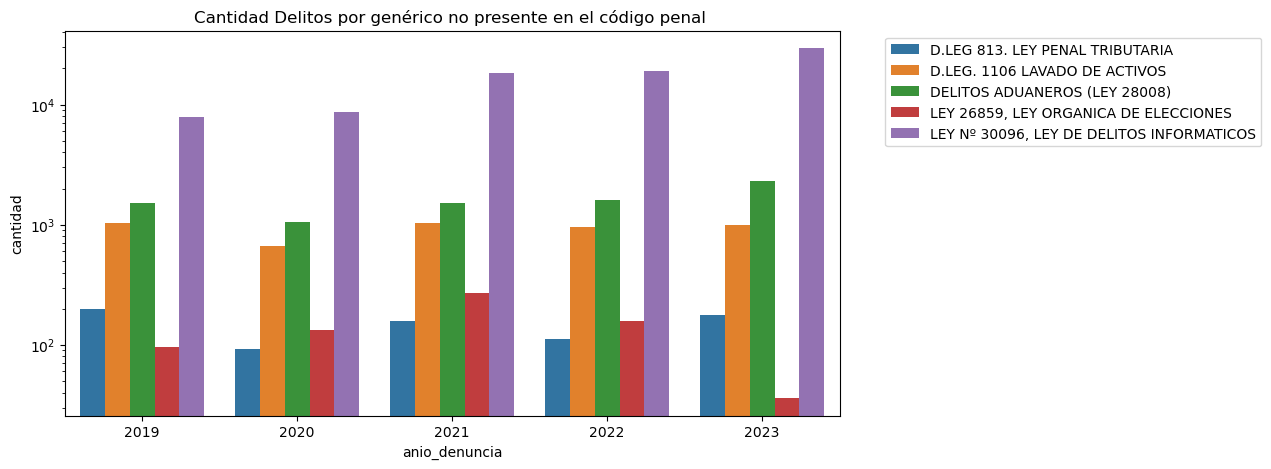

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(
    data=dd[dd['generico'].isin(["LEY Nº 30096, LEY DE DELITOS INFORMATICOS", 
                                 "DELITOS ADUANEROS (LEY 28008)", 
                                 "D.LEG. 1106 LAVADO DE ACTIVOS", 
                                 "D.LEG 813. LEY PENAL TRIBUTARIA", 
                                 "LEY 26859, LEY ORGANICA DE ELECCIONES"])], 
    x='anio_denuncia', y='cantidad', hue='generico', ax=ax, estimator=sum, ci=None)
plt.title("Cantidad Delitos por genérico no presente en el código penal ")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Mueve la leyenda fuera del gráfico
plt.yscale('log')
plt.show()

In [ ]:
cod_inseguridad = [
    "CONTRA LA VIDA/EL CUERPO Y LA SALUD",
    "CONTRA LA LIBERTAD",
    "CONTRA EL PATRIMONIO",
    "CONTRA LA TRANQUILIDAD PUBLICA",
    "CONTRA LA SEGURIDAD PUBLICA"
]

C:\Users\dial_\AppData\Local\Temp\ipykernel_3084\2591507606.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


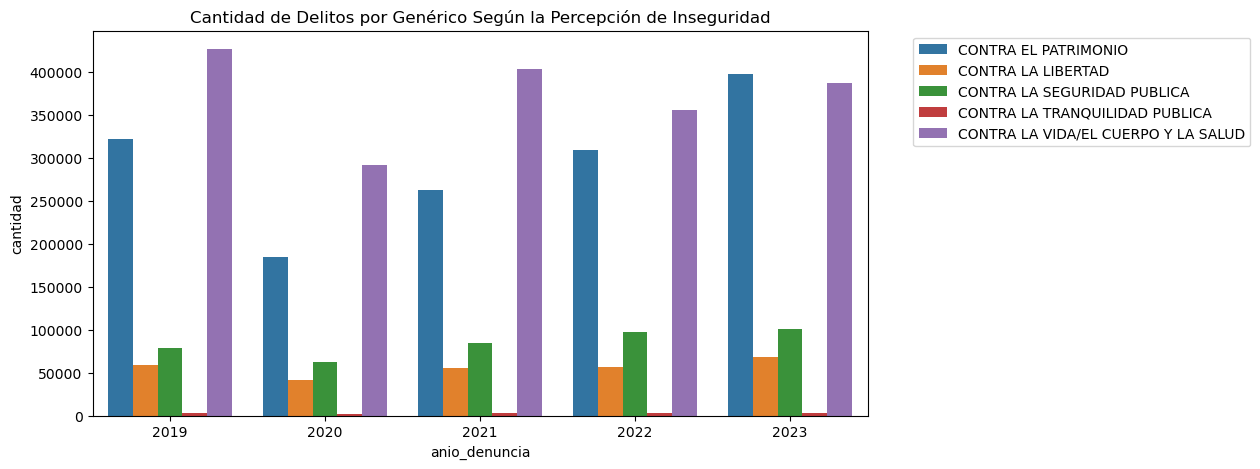

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(
    data=dd[dd['generico'].isin(cod_inseguridad)],
    x='anio_denuncia', y='cantidad', hue='generico', ax=ax, estimator=sum, ci=None
)
plt.title("Cantidad de Delitos por Genérico Según la Percepción de Inseguridad")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Mueve la leyenda fuera del gráfico
# plt.yscale('log')
plt.show()

In [15]:
#dame la tabla por año de la cantidad de delitos por generico que sea de la lista cod_inseguridad
dd_cod_inseguridad = dd[dd['generico'].isin(cod_inseguridad)]
dd_cod_inseguridad = dd_cod_inseguridad.groupby(['anio_denuncia', 'generico']).agg({'cantidad': 'sum'}).reset_index()
display(dd_cod_inseguridad)

,anio_denuncia,generico,cantidad
0,2019,CONTRA EL PATRIMONIO,321591
1,2019,CONTRA LA LIBERTAD,59399
2,2019,CONTRA LA SEGURIDAD PUBLICA,79171
3,2019,CONTRA LA TRANQUILIDAD PUBLICA,3293
4,2019,CONTRA LA VIDA/EL CUERPO Y LA SALUD,426596
5,2020,CONTRA EL PATRIMONIO,184754
6,2020,CONTRA LA LIBERTAD,41251
7,2020,CONTRA LA SEGURIDAD PUBLICA,62862
8,2020,CONTRA LA TRANQUILIDAD PUBLICA,2033
9,2020,CONTRA LA VIDA/EL CUERPO Y LA SALUD,291806


In [16]:
# Calcular el total de delitos en todos los delitos (no solo inseguridad ciudadana) por año
total_delitos_por_anio = dd.groupby('anio_denuncia')['cantidad'].sum().reset_index()
total_delitos_por_anio = total_delitos_por_anio.rename(columns={'cantidad': 'total_delitos_anio'})

# Unir la tabla con los totales de delitos de cada año
dd_cod_inseguridad = dd_cod_inseguridad.merge(total_delitos_por_anio, on='anio_denuncia')


In [17]:
# Calcular el porcentaje dentro de cada año
dd_cod_inseguridad['porcentaje'] = (dd_cod_inseguridad['cantidad'] / dd_cod_inseguridad['total_delitos_anio']) * 100

# Mostrar la tabla resultante
display(dd_cod_inseguridad)

,anio_denuncia,generico,cantidad,total_delitos_anio,porcentaje
0,2019,CONTRA EL PATRIMONIO,321591,1077913,29.834597
1,2019,CONTRA LA LIBERTAD,59399,1077913,5.510556
2,2019,CONTRA LA SEGURIDAD PUBLICA,79171,1077913,7.344841
3,2019,CONTRA LA TRANQUILIDAD PUBLICA,3293,1077913,0.305498
4,2019,CONTRA LA VIDA/EL CUERPO Y LA SALUD,426596,1077913,39.576107
5,2020,CONTRA EL PATRIMONIO,184754,692371,26.684249
6,2020,CONTRA LA LIBERTAD,41251,692371,5.957933
7,2020,CONTRA LA SEGURIDAD PUBLICA,62862,692371,9.079236
8,2020,CONTRA LA TRANQUILIDAD PUBLICA,2033,692371,0.293629
9,2020,CONTRA LA VIDA/EL CUERPO Y LA SALUD,291806,692371,42.145902


In [18]:
#suma todos los porcentajes de dd_cod_inseguridad del año 2019
dd_cod_inseguridad[dd_cod_inseguridad['anio_denuncia'] == 2019]['porcentaje'].sum()

82.57159900659886

C:\Users\dial_\AppData\Local\Temp\ipykernel_3084\2733924972.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


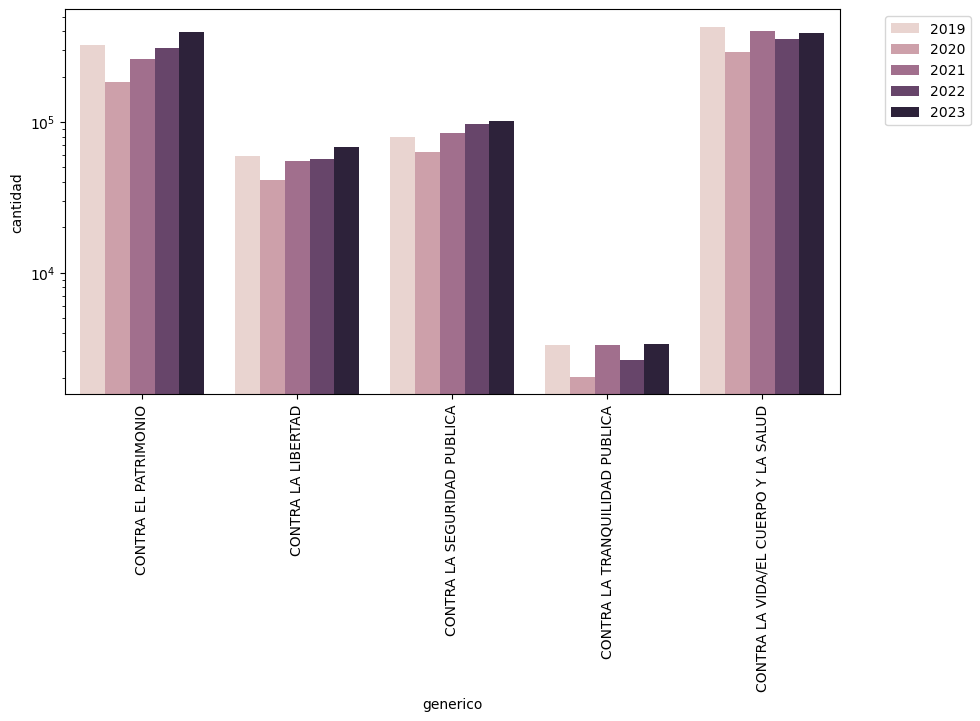

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(
    data=dd[dd['generico'].isin(cod_inseguridad)],
    x='generico', y='cantidad', hue='anio_denuncia', estimator=sum, ci=None
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [20]:
# Cantidad de denuncias por departamento y año
total_denuncias_por_dep_anio = dd.groupby(['dpto_pjfs', 'anio_denuncia'])['cantidad'].sum().reset_index()
total_denuncias_por_dep_anio.rename(columns={'cantidad': 'total_denuncias'}, inplace=True)

In [ ]:
display(dd)

In [21]:
# Filtrar solo los delitos relacionados con inseguridad ciudadana
df_inseguridad_dep = dd[dd['generico'].isin(cod_inseguridad)]

# Agrupar por departamento, año y genérico
df_inseguridad_agrupado = df_inseguridad_dep.groupby(['dpto_pjfs', 'anio_denuncia', 'generico'])['cantidad'].sum().reset_index()

# Unir con el total de denuncias por departamento y año
df_inseguridad_agrupado = df_inseguridad_agrupado.merge(total_denuncias_por_dep_anio, on=['dpto_pjfs', 'anio_denuncia'])

# Calcular el porcentaje
df_inseguridad_agrupado['porcentaje'] = (df_inseguridad_agrupado['cantidad'] / df_inseguridad_agrupado['total_denuncias']) * 100

display(df_inseguridad_agrupado)

,dpto_pjfs,anio_denuncia,generico,cantidad,total_denuncias,porcentaje
0,AMAZONAS,2019,CONTRA EL PATRIMONIO,2656,10822,24.542598
1,AMAZONAS,2019,CONTRA LA LIBERTAD,719,10822,6.643874
2,AMAZONAS,2019,CONTRA LA SEGURIDAD PUBLICA,605,10822,5.590464
3,AMAZONAS,2019,CONTRA LA TRANQUILIDAD PUBLICA,19,10822,0.175568
4,AMAZONAS,2019,CONTRA LA VIDA/EL CUERPO Y LA SALUD,4128,10822,38.144520
...,...,...,...,...,...,...
620,UCAYALI,2023,CONTRA EL PATRIMONIO,7745,24864,31.149453
621,UCAYALI,2023,CONTRA LA LIBERTAD,1921,24864,7.726030
622,UCAYALI,2023,CONTRA LA SEGURIDAD PUBLICA,3522,24864,14.165058
623,UCAYALI,2023,CONTRA LA TRANQUILIDAD PUBLICA,54,24864,0.217181


In [22]:
porcentaje_inseguridad_anio = df_inseguridad_agrupado.groupby(['dpto_pjfs', 'anio_denuncia']).agg({
    'cantidad': 'sum', 
    'total_denuncias': 'first',  
}).reset_index()

porcentaje_inseguridad_anio['porcentaje_inseguridad'] = (
    porcentaje_inseguridad_anio['cantidad'] / porcentaje_inseguridad_anio['total_denuncias']
) * 100

display(porcentaje_inseguridad_anio)

,dpto_pjfs,anio_denuncia,cantidad,total_denuncias,porcentaje_inseguridad
0,AMAZONAS,2019,8127,10822,75.097025
1,AMAZONAS,2020,6754,8572,78.791414
2,AMAZONAS,2021,10967,14035,78.140363
3,AMAZONAS,2022,10043,13787,72.843983
4,AMAZONAS,2023,11036,14956,73.789783
...,...,...,...,...,...
120,UCAYALI,2019,20391,24748,82.394537
121,UCAYALI,2020,10547,12865,81.982122
122,UCAYALI,2021,9151,12772,71.648920
123,UCAYALI,2022,12347,16390,75.332520


In [23]:
# Unir con la población total de cada departamento en 2020 asegurando que no haya duplicados
porcentaje_inseguridad_anio = porcentaje_inseguridad_anio.merge(
    departamentos[['DEPARTAMEN', 'poblacion_total_2020']].drop_duplicates(), 
    left_on='dpto_pjfs', 
    right_on='DEPARTAMEN', 
    how='left'
)

# Calcular correctamente la tasa de denuncias por 100k habitantes
porcentaje_inseguridad_anio['tasa_denuncias_por_100k_inseguridad'] = (
    porcentaje_inseguridad_anio['cantidad'] / porcentaje_inseguridad_anio['poblacion_total_2020']
) * 100000

# Eliminar la columna extra después del merge
porcentaje_inseguridad_anio.drop(columns=['DEPARTAMEN'], inplace=True)

# Mostrar los resultados únicos por departamento y año
porcentaje_inseguridad_anio = porcentaje_inseguridad_anio.drop_duplicates(subset=['dpto_pjfs', 'anio_denuncia'])
display(porcentaje_inseguridad_anio)

,dpto_pjfs,anio_denuncia,cantidad,total_denuncias,porcentaje_inseguridad,poblacion_total_2020,tasa_denuncias_por_100k_inseguridad
0,AMAZONAS,2019,8127,10822,75.097025,472993,1718.207246
1,AMAZONAS,2020,6754,8572,78.791414,472993,1427.928109
2,AMAZONAS,2021,10967,14035,78.140363,472993,2318.638965
3,AMAZONAS,2022,10043,13787,72.843983,472993,2123.287237
4,AMAZONAS,2023,11036,14956,73.789783,472993,2333.226919
...,...,...,...,...,...,...,...
120,UCAYALI,2019,20391,24748,82.394537,632861,3222.034538
121,UCAYALI,2020,10547,12865,81.982122,632861,1666.558691
122,UCAYALI,2021,9151,12772,71.648920,632861,1445.973128
123,UCAYALI,2022,12347,16390,75.332520,632861,1950.981337


In [24]:
departamentos_mapa = departamentos.merge(
    porcentaje_inseguridad_anio, 
    left_on=['DEPARTAMEN', 'anio_denuncia'], 
    right_on=['dpto_pjfs', 'anio_denuncia'], 
    how='left'
)

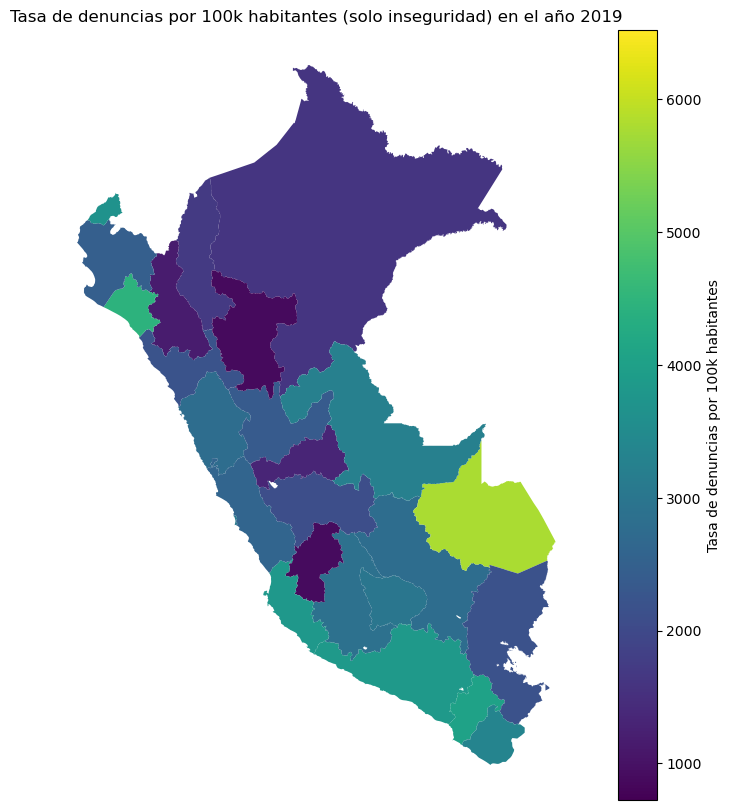

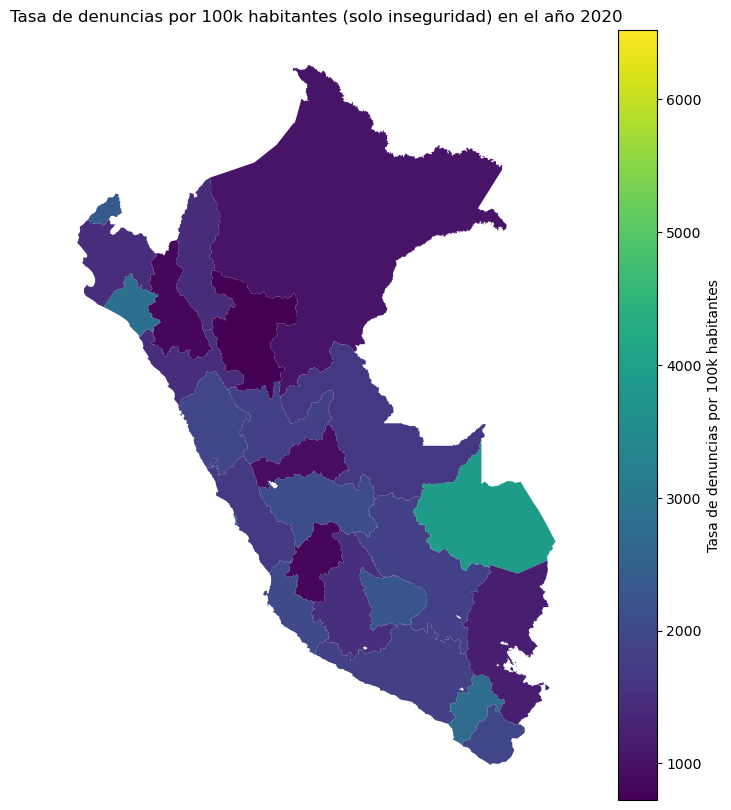

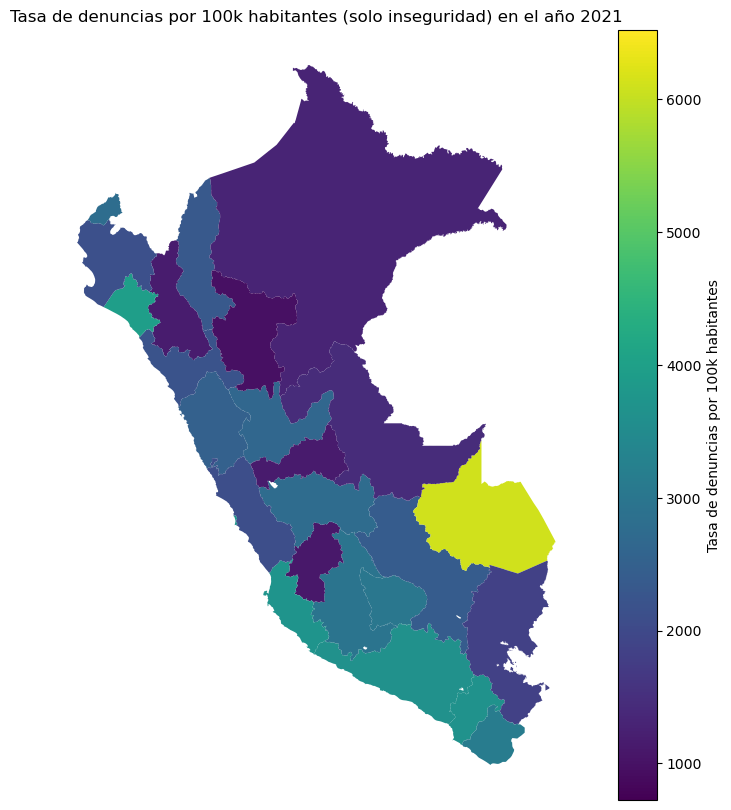

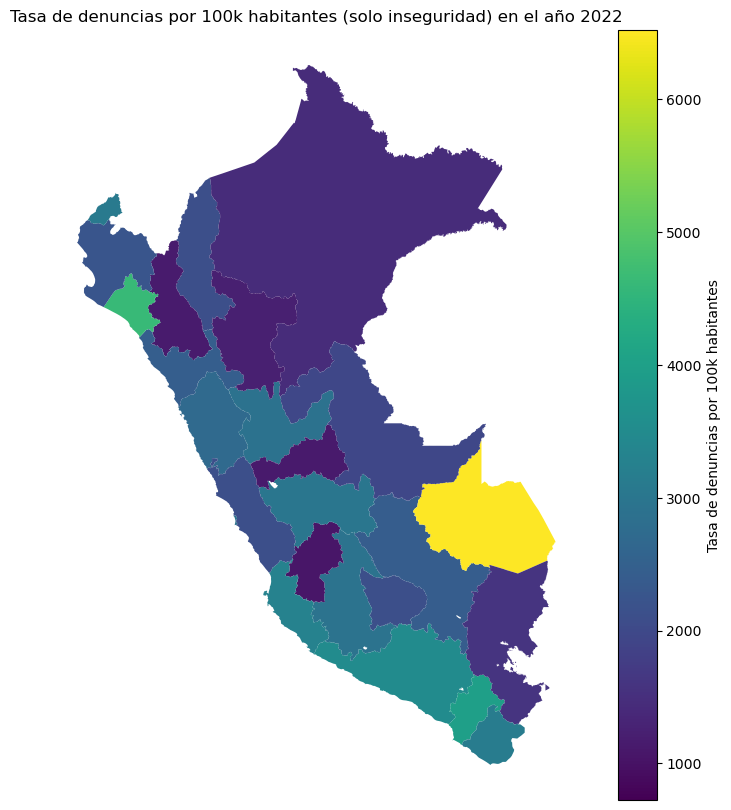

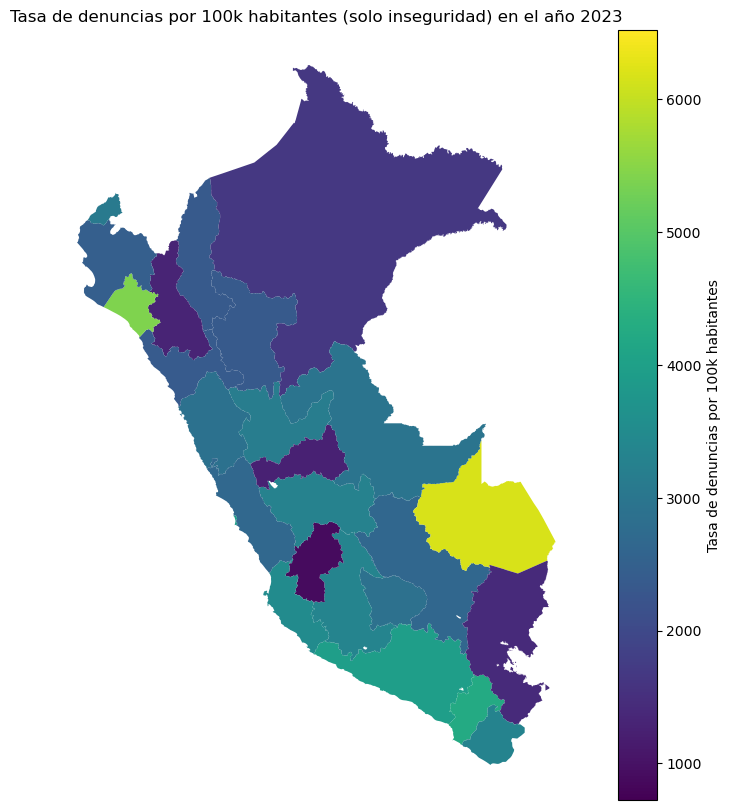

In [25]:
vmin = departamentos_mapa["tasa_denuncias_por_100k_inseguridad"].min()
vmax = departamentos_mapa["tasa_denuncias_por_100k_inseguridad"].max()

for anio in departamentos_mapa["anio_denuncia"].unique():
    fig, ax = plt.subplots(figsize=(10, 10))
    
    departamentos_mapa_anio = departamentos_mapa[departamentos_mapa["anio_denuncia"] == anio]
    
    departamentos_mapa_anio.plot(
        column='tasa_denuncias_por_100k_inseguridad', 
        cmap='viridis',  # Puedes probar con 'plasma', 'inferno' o 'cividis' para mejor contraste
        legend=True,
        legend_kwds={'label': "Tasa de denuncias por 100k habitantes"},
        vmin=vmin,  # Escala uniforme en todos los mapas
        vmax=vmax,
        ax=ax
    )
    
    ax.set_title(f"Tasa de denuncias por 100k habitantes (solo inseguridad) en el año {anio}")
    ax.axis("off")  # Ocultar ejes
    
    # Mostrar el mapa
    plt.show()



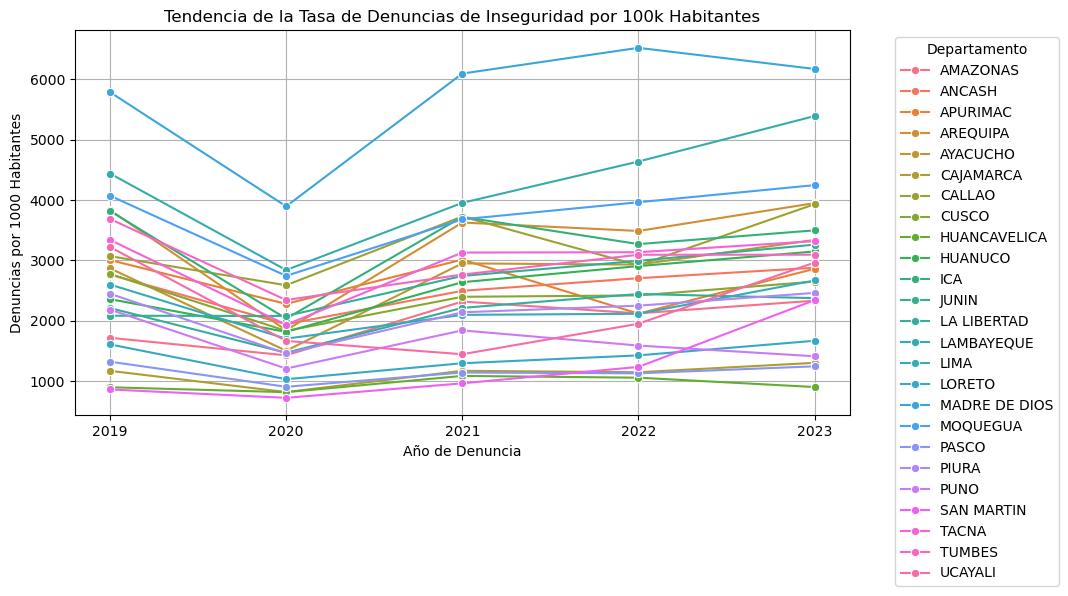

In [31]:
#GRÁFICO DE TENDENCIA
plt.figure(figsize=(10, 5))
sns.lineplot(data=porcentaje_inseguridad_anio, x='anio_denuncia', y='tasa_denuncias_por_100k_inseguridad', hue='dpto_pjfs', marker='o')

# Personalización del gráfico
plt.title("Tendencia de la Tasa de Denuncias de Inseguridad por 100k Habitantes")
plt.xlabel("Año de Denuncia")
plt.ylabel("Denuncias por 1000 Habitantes")
plt.legend(title="Departamento", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Ajustar los ticks del eje X para que solo muestre los años enteros
plt.xticks(ticks=[2019, 2020, 2021, 2022, 2023], labels=[2019, 2020, 2021, 2022, 2023])

# Mostrar el gráfico
plt.show()

#### Transformación de unión

In [32]:
porcentaje_inseguridad_anio = porcentaje_inseguridad_anio.rename(columns={
    "dpto_pjfs": "dominio",
    "anio_denuncia": "anio"
})

porcentaje_inseguridad_anio.to_csv("porcentaje_inseguridad.csv", index=False)